In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Kings XI Punjab') & (df2['team2'] == 'Royal Challengers Bangalore')]
match2 = df2[(df2['team1'] == 'Royal Challengers Bangalore') & (df2['team2'] == 'Kings XI Punjab')]

Match1 = Punjab Home Ground

Match2 = Bangalore Home Ground

# Overall Bangalore vs Punjab:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season        city        date            team1  \
41    42    2017   Bangalore  2017-05-05  Kings XI Punjab   
180  181    2010   Bangalore  2010-03-16  Kings XI Punjab   
204  205    2010  Chandigarh  2010-04-02  Kings XI Punjab   
295  296    2011  Dharamsala  2011-05-17  Kings XI Punjab   
332  333    2012  Chandigarh  2012-04-20  Kings XI Punjab   

                           team2                  toss_winner toss_decision  \
41   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
180  Royal Challengers Bangalore              Kings XI Punjab           bat   
204  Royal Challengers Bangalore              Kings XI Punjab           bat   
295  Royal Challengers Bangalore              Kings XI Punjab           bat   
332  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

     result  dl_applied                       winner  win_by_runs  \
41   normal           0              Kings XI Punjab           19   
180  normal           0  Royal Challengers Bangalore            0   
204  normal           0  Royal Challengers Bangalore            0   
295  normal           0              Kings XI Punjab          111   
332  normal           0  Royal Challengers Bangalore            0   

     win_by_wickets player_of_match  \
41                0  Sandeep Sharma   
180               8       JH Kallis   
204               6    KP Pietersen   
295               0    AC Gilchrist   
332               5        CH Gayle   

                                            venue      umpire1        umpire2  \
41                          M Chinnaswamy Stadium  CB Gaffaney  C Shamshuddin   
180                         M Chinnaswamy Stadium        S Das      DJ Harper   
204    Punjab Cricket Association Stadium, Mohali    BF Bowden      M Erasmus   
295  Himachal Pradesh Cricket Association Stadium    Asad Rauf      AM Saheba   
332    Punjab Cricket Association Stadium, Mohali       S Ravi      RJ Tucker   

    umpire3  
41      NaN  
180     NaN  
204     NaN  
295     NaN  
332     NaN

Matches played between Punjab and Bangalore

In [6]:
match.shape

(24, 18)

In [7]:
match['winner'].value_counts()

Kings XI Punjab                12
Royal Challengers Bangalore    12
Name: winner, dtype: int64

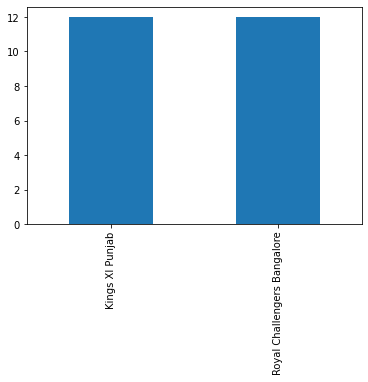

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

Both win 12 matches each against each other.

In [9]:
match['toss_winner'].value_counts()

Kings XI Punjab                13
Royal Challengers Bangalore    11
Name: toss_winner, dtype: int64

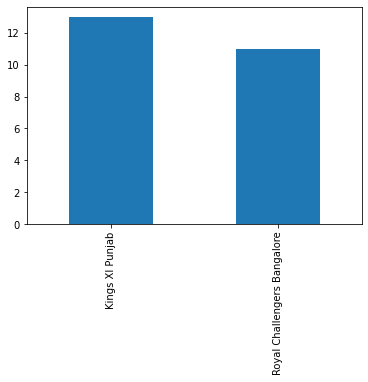

In [10]:
match['toss_winner'].value_counts().plot.bar()
plt.show()

Bangalore won toss 11 times and Punjab 13 times.

In [11]:
match['toss_decision'].value_counts()

field    17
bat       7
Name: toss_decision, dtype: int64

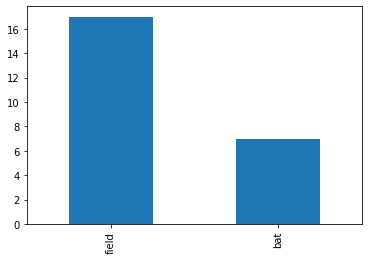

In [12]:
match['toss_decision'].value_counts().plot.bar()
plt.show()

Toss winning team decided to field first 17 times and bat first 7 times.

In [13]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Kings XI Punjab                6
Royal Challengers Bangalore    5
Name: winner, dtype: int64

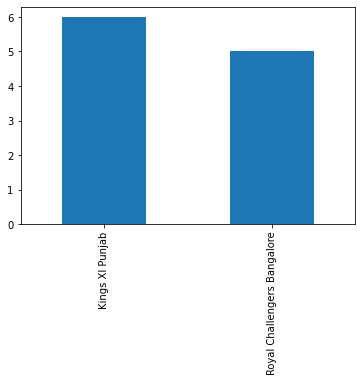

In [14]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

1. Punjab won the toss and won the match 6 times, whereas Bangalore won 5 times.
2. So winning toss doesn't really matter.

In [94]:
ids = list(match['id'])
ids1 = list(match2['id'])
delivery = df1[(df1['match_id'].isin(ids))]
delivery.head()

match_id  inning                 batting_team     bowling_team  over  \
1678         8       1  Royal Challengers Bangalore  Kings XI Punjab     1   
1679         8       1  Royal Challengers Bangalore  Kings XI Punjab     1   
1680         8       1  Royal Challengers Bangalore  Kings XI Punjab     1   
1681         8       1  Royal Challengers Bangalore  Kings XI Punjab     1   
1682         8       1  Royal Challengers Bangalore  Kings XI Punjab     1   

      ball       batsman   non_striker    bowler  is_super_over  ...  \
1678     1     SR Watson  Vishnu Vinod  AR Patel              0  ...   
1679     2  Vishnu Vinod     SR Watson  AR Patel              0  ...   
1680     3  Vishnu Vinod     SR Watson  AR Patel              0  ...   
1681     4     SR Watson  Vishnu Vinod  AR Patel              0  ...   
1682     5     SR Watson  Vishnu Vinod  AR Patel              0  ...   

      bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  \
1678         0            0            0             0             1   
1679         0            0            0             0             0   
1680         0            0            0             0             1   
1681         0            0            0             0             0   
1682         0            0            0             0             0   

      extra_runs  total_runs  player_dismissed dismissal_kind fielder  
1678           0           1               NaN            NaN     NaN  
1679           0           0               NaN            NaN     NaN  
1680           0           1               NaN            NaN     NaN  
1681           0           0               NaN            NaN     NaN  
1682           0           0               NaN            NaN     NaN  

[5 rows x 21 columns]

In [107]:
ids1

[8, 84, 94, 127, 139, 280, 350, 429, 448, 475, 557, 615, 626, 11333]

Getting the details ball by ball of the matches played between Bangalore and Punjab.

## Punjab Wickets:

In [95]:
total_wickets_fallen_Punjab = delivery[(delivery['batting_team'] == 'Kings XI Punjab')]['player_dismissed'].count()
total_wickets_fallen_Punjab

135

Total 135 wickets fallen of Punjab against Bangalore till now.

In [96]:
avg_wicket_fallen_Punjab = math.ceil(total_wickets_fallen_Punjab/len(ids))
avg_wicket_fallen_Punjab

6

Punjab lost 6 wickets in an average per match against Bangalore.

In [18]:
total_wickets_fallen_Punjab_batting_first = delivery[(delivery['batting_team'] == 'Kings XI Punjab') & (delivery['inning'] == 1)]['player_dismissed'].count()
total_wickets_fallen_Punjab_batting_first

61

Punjab lost 61 wickets against Bangalore while batting first.

In [19]:
total_matches_batting_first_against_Bangalore = len(delivery[(delivery['inning'] == 1) & (delivery['batting_team'] == 'Kings XI Punjab')]['match_id'].value_counts())
total_matches_batting_first_against_Bangalore

10

Punjab batted in first innings in 10 matches against Bangalore.

In [20]:
avg_wicket_fallen_batting_first_Bangalore = math.ceil(total_wickets_fallen_Punjab_batting_first/total_matches_batting_first_against_Bangalore)
avg_wicket_fallen_batting_first_Bangalore

7

Punjab lost 7 wickets in an average per match against Bangalore while batting in first inning.

In [21]:
total_wickets_fallen_Punjab_batting_second = delivery[(delivery['batting_team'] == 'Kings XI Punjab') & (delivery['inning'] == 2)]['player_dismissed'].count()
total_wickets_fallen_Punjab_batting_second

74

Punjab lost 74 wickets against Bangalore while batting second.

In [22]:
total_matches_batting_second_against_Bangalore = len(delivery[(delivery['inning'] == 2) & (delivery['batting_team'] == 'Kings XI Punjab')]['match_id'].value_counts())
total_matches_batting_second_against_Bangalore

14

Punjab batted in second innings in 14 matches against Bangalore.

In [23]:
avg_wicket_fallen_batting_second_Bangalore = math.ceil(total_wickets_fallen_Punjab_batting_second/total_matches_batting_second_against_Bangalore)
avg_wicket_fallen_batting_second_Bangalore

6

Punjab lost 6 wickets in an average per match against Bangalore while batting in second inning.

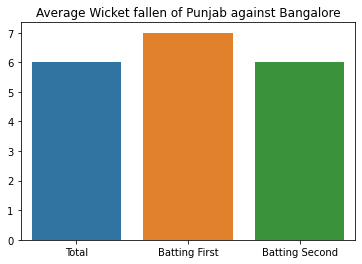

In [24]:
avg_Punjab_wickets_per_match = pd.Series([avg_wicket_fallen_Punjab,avg_wicket_fallen_batting_first_Bangalore,avg_wicket_fallen_batting_second_Bangalore],index=['Total','Batting First','Batting Second'])
sns.barplot(x=avg_Punjab_wickets_per_match.index,y=avg_Punjab_wickets_per_match)
plt.title('Average Wicket fallen of Punjab against Bangalore')
plt.show()

Punajab lost more wickets against Bangalore while batting first.

## Kohli ABD Partnership Runs:

In [25]:
total_partnership_runs_Punjab = delivery[((delivery['batsman'] == 'AB de Villiers') & (delivery['non_striker'] == 'V Kohli')) | ((delivery['non_striker'] == 'AB de Villiers') & (delivery['batsman'] == 'V Kohli'))]['total_runs'].sum()
total_partnership_runs_Punjab

120

Kohli and ABD scored 120 runs together against Punjab.

In [26]:
total_matches_together_Punjab = len(delivery[((delivery['batsman'] == 'AB de Villiers') & (delivery['non_striker'] == 'V Kohli')) | ((delivery['non_striker'] == 'AB de Villiers') & (delivery['batsman'] == 'V Kohli'))]['match_id'].value_counts())
total_matches_together_Punjab

7

Kohli and ABD played 7 innings together against Punjab.

In [27]:
avg_partership_runs_Punjab = math.ceil(total_partnership_runs_Punjab/total_matches_together_Punjab)
avg_partership_runs_Punjab

18

Kohli and ABD scored 18 runs in an average per match together against Punjab.

In [28]:
total_partnership_runs = df1[((df1['batsman'] == 'AB de Villiers') & (df1['non_striker'] == 'V Kohli')) | ((df1['non_striker'] == 'AB de Villiers') & (df1['batsman'] == 'V Kohli'))]['total_runs'].sum()
total_partnership_runs

2860

Kohli and ABD scored 2860 runs together overall till now.

In [29]:
total_matches_together = len(df1[((df1['batsman'] == 'AB de Villiers') & (df1['non_striker'] == 'V Kohli')) | ((df1['non_striker'] == 'AB de Villiers') & (df1['batsman'] == 'V Kohli'))]['match_id'].value_counts())
total_matches_together

68

Kohli and ABD played 68 innings together overall.

In [30]:
avg_partership_runs = math.ceil(total_partnership_runs/total_matches_together)
avg_partership_runs

43

Kohli and ABD scored 43 runs in an average per match together.

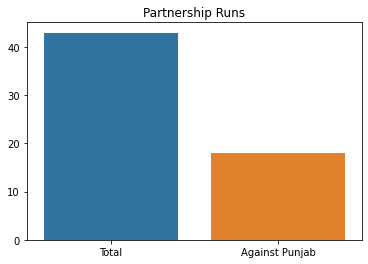

In [31]:
partnership_runs = pd.Series([avg_partership_runs,avg_partership_runs_Punjab],index=['Total','Against Punjab'])
sns.barplot(x = partnership_runs.index , y = partnership_runs)
plt.title('Partnership Runs')
plt.show()

There partnership runs against punjab is quite low compare to total partnership runs.

## Total 6s:

In [32]:
total_6s = len(delivery[delivery['batsman_runs'] == 6]['batsman_runs'])
total_6s

289

Total 289 sixes hit in Bangalore vs Punjab match.

In [33]:
total_6s_by_Punjab = len(delivery[(delivery['batting_team'] == 'Kings XI Punjab') & (delivery['batsman_runs'] == 6)]['batsman_runs'])
total_6s_by_Punjab

130

Punjab hit 130 sixes against Bangalore till now.

In [34]:
total_6s_by_Bangalore = len(delivery[(delivery['batting_team'] != 'Kings XI Punjab') & (delivery['batsman_runs'] == 6)]['batsman_runs'])
total_6s_by_Bangalore

159

Bangalore hit 159 sixes against Punjab till now.

In [35]:
avg_6s = math.ceil(total_6s/len(ids))
avg_6s

13

In an average 13 sixes hit in a match between Punjab vs Bangalore.

In [36]:
total_6s_1st_inning = len(delivery[(delivery['batsman_runs'] == 6) & (delivery['inning'] == 1)]['batsman_runs'])
total_6s_1st_inning

173

173 sixes hit when team batting first.

In [37]:
total_6s_2nd_inning = len(delivery[(delivery['batsman_runs'] == 6) & (delivery['inning'] == 2)]['batsman_runs'])
total_6s_2nd_inning

116

116 sixes hit when team batting second.

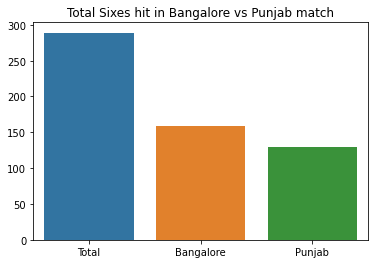

In [38]:
total_6s_per_match = pd.Series([total_6s,total_6s_by_Bangalore,total_6s_by_Punjab],index=['Total','Bangalore','Punjab'])
sns.barplot(x = total_6s_per_match.index , y = total_6s_per_match)
plt.title('Total Sixes hit in Bangalore vs Punjab match')
plt.show()

1. Bangalore hit more sixes than Punjab.
2. Team when batted first, hit more sixes than the team batting second.

## No Balls:

In [39]:
total_no_balls = delivery['noball_runs'].sum()
total_no_balls

29

Total 29 no balls were bowled.

In [40]:
noballs_by_Bangalore = delivery[delivery['bowling_team'] != 'Kings XI Punjab']['noball_runs'].sum()
noballs_by_Bangalore

9

Bangalore bowled 9 no balls against Punjab.

In [41]:
noballs_by_Punjab = delivery[delivery['bowling_team'] == 'Kings XI Punjab']['noball_runs'].sum()
noballs_by_Punjab

20

Punjab bowled 20 no balls against Bangalore.

In [43]:
avg_noballs = math.ceil(total_no_balls/len(ids))
avg_noballs

2

There is 2 no balls in an average per match.

In [44]:
noballs_bowling_first = delivery[delivery['inning'] == 1]['noball_runs'].sum()
noballs_bowling_first

16

Team bowled 16 no balls while bowling first.

In [45]:
avg_noballs_bowling_first = math.ceil(noballs_bowling_first/len(ids))
avg_noballs_bowling_first

1

There is 1 no ball in an average per match while bowling first.

In [46]:
noballs_bowling_second = delivery[delivery['inning'] == 2]['noball_runs'].sum()
noballs_bowling_second

13

Team bowled 13 no balls while bowling second.

In [47]:
avg_noballs_bowling_second = math.ceil(noballs_bowling_second/len(ids))
avg_noballs_bowling_second

1

There is 1 no ball in an average per match while bowling second.

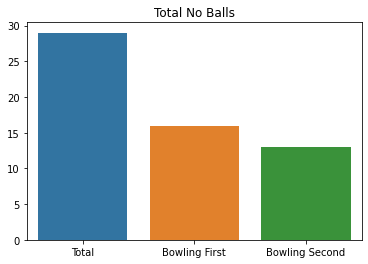

In [48]:
total_noballs_per_match = pd.Series([total_no_balls,noballs_bowling_first,noballs_bowling_second],index=['Total','Bowling First','Bowling Second'])
sns.barplot(x = total_noballs_per_match.index , y = total_noballs_per_match)
plt.title('Total No Balls')
plt.show()

Team bowling first, bowled more no balls than team bowling second.

# Bangalore Home Ground:

In [49]:
match2.shape

(14, 18)

In [50]:
match2['winner'].value_counts()

Kings XI Punjab                8
Royal Challengers Bangalore    6
Name: winner, dtype: int64

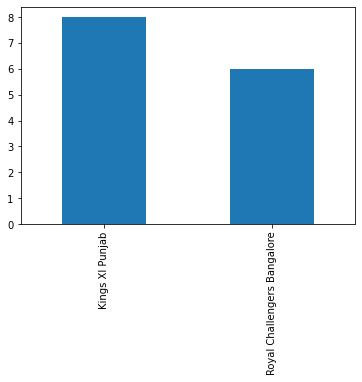

In [51]:
match2['winner'].value_counts().plot.bar()
plt.show()

Punjab won 8 times and Bangalore won 6 times against each other at Bangalore home ground.

In [52]:
match2['toss_winner'].value_counts()

Kings XI Punjab                10
Royal Challengers Bangalore     4
Name: toss_winner, dtype: int64

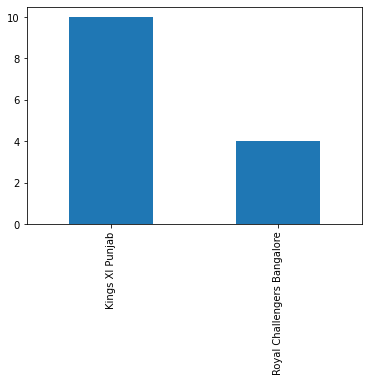

In [53]:
match2['toss_winner'].value_counts().plot.bar()
plt.show()

Punjab won the toss 10 times and Bangalore 4 times..

In [54]:
match2['toss_decision'].value_counts()

field    10
bat       4
Name: toss_decision, dtype: int64

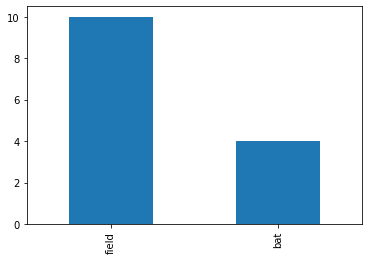

In [55]:
match2['toss_decision'].value_counts().plot.bar()
plt.show()

toss winning team chose to field first after winning toss 10 times at Bangalore home ground.

In [56]:
match2[match2['toss_winner'] == match2['winner']]['winner'].value_counts()

Kings XI Punjab                5
Royal Challengers Bangalore    1
Name: winner, dtype: int64

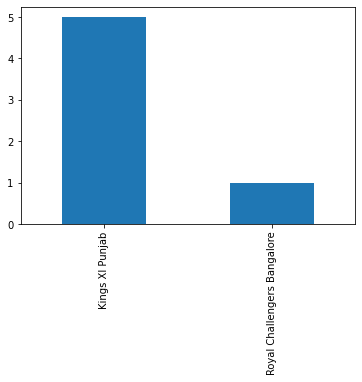

In [57]:
match2[match2['toss_winner'] == match2['winner']]['winner'].value_counts().plot.bar()
plt.show()

Punjab won 5 out of 10 times after winning toss at Bangalore home ground.

In [116]:
delivery1 = df1[(df1['match_id'].isin(ids1))]
delivery1.head()

match_id  inning                 batting_team     bowling_team  over  \
1678         8       1  Royal Challengers Bangalore  Kings XI Punjab     1   
1679         8       1  Royal Challengers Bangalore  Kings XI Punjab     1   
1680         8       1  Royal Challengers Bangalore  Kings XI Punjab     1   
1681         8       1  Royal Challengers Bangalore  Kings XI Punjab     1   
1682         8       1  Royal Challengers Bangalore  Kings XI Punjab     1   

      ball       batsman   non_striker    bowler  is_super_over  ...  \
1678     1     SR Watson  Vishnu Vinod  AR Patel              0  ...   
1679     2  Vishnu Vinod     SR Watson  AR Patel              0  ...   
1680     3  Vishnu Vinod     SR Watson  AR Patel              0  ...   
1681     4     SR Watson  Vishnu Vinod  AR Patel              0  ...   
1682     5     SR Watson  Vishnu Vinod  AR Patel              0  ...   

      bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  \
1678         0            0            0             0             1   
1679         0            0            0             0             0   
1680         0            0            0             0             1   
1681         0            0            0             0             0   
1682         0            0            0             0             0   

      extra_runs  total_runs  player_dismissed dismissal_kind fielder  
1678           0           1               NaN            NaN     NaN  
1679           0           0               NaN            NaN     NaN  
1680           0           1               NaN            NaN     NaN  
1681           0           0               NaN            NaN     NaN  
1682           0           0               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Bangalore and Punjab at Bangalore home ground.

## Punjab Wickets fallen at Bangalore Home Ground:

In [118]:
total_wickets_fallen_Punjab_Bangalore_home_ground = delivery1[(delivery1['batting_team'] == 'Kings XI Punjab')]['player_dismissed'].count()
total_wickets_fallen_Punjab_Bangalore_home_ground

74

Total 74 wickets fallen of Punjab against Bangalore at Bangalore home ground till now.

In [119]:
avg_wicket_fallen_Punjab_Bangalore_home_ground = math.ceil(total_wickets_fallen_Punjab_Bangalore_home_ground/len(ids1))
avg_wicket_fallen_Punjab_Bangalore_home_ground

6

Punjab lost 6 wickets in an average per match against Bangalore at Bangalore home ground.

In [104]:
total_matches_batting_first_against_Bangalore_Bangalore_home_ground = len(delivery1[(delivery1['inning'] == 1) & (delivery1['batting_team'] == 'Kings XI Punjab')]['match_id'].value_counts())
total_matches_batting_first_against_Bangalore_Bangalore_home_ground

0

Punjab didn't bat in first innings against Bangalore at Bangalore home ground.

In [121]:
total_wickets_fallen_Punjab_batting_second_Bangalore_home_ground = delivery1[(delivery1['batting_team'] == 'Kings XI Punjab') & (delivery1['inning'] == 2)]['player_dismissed'].count()
total_wickets_fallen_Punjab_batting_second_Bangalore_home_ground

74

Punjab lost 10 wickets against Bangalore while batting second at Bangalore home ground.

In [122]:
total_matches_batting_second_against_Bangalore_Bangalore_home_ground = len(delivery1[(delivery1['inning'] == 2) & (delivery1['batting_team'] == 'Kings XI Punjab')]['match_id'].value_counts())
total_matches_batting_second_against_Bangalore_Bangalore_home_ground

14

Punjab batted in second innings in 4 matches against Bangalore at Bangalore home ground.

In [123]:
avg_wicket_fallen_batting_second_Bangalore_bangalore_home_ground = math.ceil(total_wickets_fallen_Punjab_batting_second_Bangalore_home_ground/total_matches_batting_second_against_Bangalore_Bangalore_home_ground)
avg_wicket_fallen_batting_second_Bangalore_bangalore_home_ground

6

Punjab lost 6 wickets in an average per match against Bangalore while batting in second inning at Bangalore home ground.

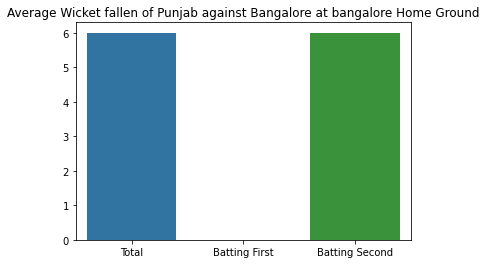

In [124]:
avg_Punjab_wickets_per_match_bangalore_home_ground = pd.Series([avg_wicket_fallen_Punjab_Bangalore_home_ground,0,avg_wicket_fallen_batting_second_Bangalore_bangalore_home_ground],index=['Total','Batting First','Batting Second'])
sns.barplot(x=avg_Punjab_wickets_per_match_bangalore_home_ground.index,y=avg_Punjab_wickets_per_match_bangalore_home_ground)
plt.title('Average Wicket fallen of Punjab against Bangalore at bangalore Home Ground')
plt.show()

Punjab lost all wickets against Bangalore while batting second because they didn't bat first against Bangalore at Bangalore home ground.

## Kohli ABD Partnership Runs at Bangalore Home Ground:

In [125]:
total_partnership_runs_Punjab_Bangalore_home_ground = delivery1[((delivery1['batsman'] == 'AB de Villiers') & (delivery1['non_striker'] == 'V Kohli')) | ((delivery1['non_striker'] == 'AB de Villiers') & (delivery1['batsman'] == 'V Kohli'))]['total_runs'].sum()
total_partnership_runs_Punjab_Bangalore_home_ground

34

Kohli and ABD scored 34 runs together against Punjab at Bangalore home ground.

In [126]:
total_matches_together_Punjab_bangalore_home_ground = len(delivery1[((delivery1['batsman'] == 'AB de Villiers') & (delivery1['non_striker'] == 'V Kohli')) | ((delivery1['non_striker'] == 'AB de Villiers') & (delivery1['batsman'] == 'V Kohli'))]['match_id'].value_counts())
total_matches_together_Punjab_bangalore_home_ground

6

Kohli and ABD played 6 innings together against Punjab at Bangalore home ground.

In [132]:
avg_partership_runs_Punjab_Bangalore_home_ground = math.ceil(total_partnership_runs_Punjab_Bangalore_home_ground/total_matches_together_Punjab_bangalore_home_ground)
avg_partership_runs_Punjab_Bangalore_home_ground

6

Kohli and ABD scored 6 runs in an average per match together against Punjab at Bangalore home ground.

In [128]:
ids2 = list(df2[df2['city'] == 'Bangalore']['id'].unique())
delivery2 = df1[df1['match_id'].isin(ids2)]
delivery2.head()

match_id  inning                 batting_team      bowling_team  over  \
960         5       1  Royal Challengers Bangalore  Delhi Daredevils     1   
961         5       1  Royal Challengers Bangalore  Delhi Daredevils     1   
962         5       1  Royal Challengers Bangalore  Delhi Daredevils     1   
963         5       1  Royal Challengers Bangalore  Delhi Daredevils     1   
964         5       1  Royal Challengers Bangalore  Delhi Daredevils     1   

     ball    batsman non_striker  bowler  is_super_over  ...  bye_runs  \
960     1   CH Gayle   SR Watson  Z Khan              0  ...         0   
961     2  SR Watson    CH Gayle  Z Khan              0  ...         0   
962     3  SR Watson    CH Gayle  Z Khan              0  ...         0   
963     4  SR Watson    CH Gayle  Z Khan              0  ...         0   
964     5  SR Watson    CH Gayle  Z Khan              0  ...         0   

     legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
960            0            0             0             1           0   
961            0            0             0             4           0   
962            0            0             0             0           0   
963            0            0             0             4           0   
964            0            0             0             0           0   

     total_runs  player_dismissed dismissal_kind fielder  
960           1               NaN            NaN     NaN  
961           4               NaN            NaN     NaN  
962           0               NaN            NaN     NaN  
963           4               NaN            NaN     NaN  
964           0               NaN            NaN     NaN  

[5 rows x 21 columns]

All the matches played in Bangalore home ground.

In [129]:
total_partnership_runs_Bangalore_home_ground = delivery2[((delivery2['batsman'] == 'AB de Villiers') & (delivery2['non_striker'] == 'V Kohli')) | ((delivery2['non_striker'] == 'AB de Villiers') & (delivery2['batsman'] == 'V Kohli'))]['total_runs'].sum()
total_partnership_runs_Bangalore_home_ground

1012

Kohli and ABD scored 1012 runs together at Bangalore home ground.

In [130]:
total_matches_together_Bangalore_home_ground = len(delivery2[((delivery2['batsman'] == 'AB de Villiers') & (delivery2['non_striker'] == 'V Kohli')) | ((delivery2['non_striker'] == 'AB de Villiers') & (delivery2['batsman'] == 'V Kohli'))]['match_id'].value_counts())
total_matches_together_Bangalore_home_ground

25

Kohli and ABD played 25 innings together overall at Bangalore home ground.

In [131]:
avg_partership_runs_Bangalore_home_ground = math.ceil(total_partnership_runs_Bangalore_home_ground/total_matches_together_Bangalore_home_ground)
avg_partership_runs_Bangalore_home_ground

41

Kohli and ABD scored 41 runs in an average per match together at Bangalore Home ground.

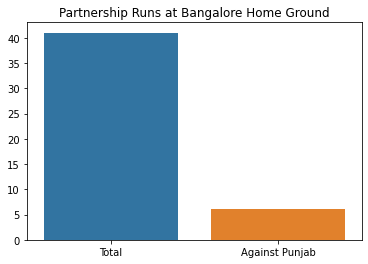

In [133]:
partnership_runs_Bangalore_home_ground = pd.Series([avg_partership_runs_Bangalore_home_ground,avg_partership_runs_Punjab_Bangalore_home_ground],index=['Total','Against Punjab'])
sns.barplot(x = partnership_runs_Bangalore_home_ground.index , y = partnership_runs_Bangalore_home_ground)
plt.title('Partnership Runs at Bangalore Home Ground')
plt.show()

They played 6 innings together against Punjab at Bangalore home ground and scored 6 partnership runs in an average where there average partnership runs in Bangalore is 41 overall.

## Total 6s at Bangalore home ground:

In [134]:
total_6s_bangalore_home_ground = len(delivery1[delivery1['batsman_runs'] == 6]['batsman_runs'])
total_6s_bangalore_home_ground

179

Total 179 sixes hit in Bangalore vs Punjab match at bangalore home ground.

In [135]:
total_6s_by_Punjab_Bangalore_home_ground = len(delivery1[(delivery1['batting_team'] == 'Kings XI Punjab') & (delivery1['batsman_runs'] == 6)]['batsman_runs'])
total_6s_by_Punjab_Bangalore_home_ground

68

Punjab hit 68 sixes against Bangalore till now at Bangalore home ground.

In [136]:
total_6s_by_Bangalore_Bangalore_home_ground = len(delivery1[(delivery1['batting_team'] != 'Kings XI Punjab') & (delivery1['batsman_runs'] == 6)]['batsman_runs'])
total_6s_by_Bangalore_Bangalore_home_ground

111

Bangalore hit 111 sixes against Punjab till now at bangalore home ground.

In [137]:
avg_6s_Banglore_home_ground = math.ceil(total_6s_bangalore_home_ground/len(ids1))
avg_6s_Banglore_home_ground

13

In an average 13 sixes hit in a match between Punjab vs Bangalore at Bangalore home ground.

In [138]:
total_6s_1st_inning_Bangalore_home_ground = len(delivery1[(delivery1['batsman_runs'] == 6) & (delivery1['inning'] == 1)]['batsman_runs'])
total_6s_1st_inning_Bangalore_home_ground

111

111 sixes hit when team batting first at Bangalore home ground.

In [139]:
total_6s_2nd_inning_Bangalore_home_ground = len(delivery1[(delivery1['batsman_runs'] == 6) & (delivery1['inning'] == 2)]['batsman_runs'])
total_6s_2nd_inning_Bangalore_home_ground

68

68 sixes hit when team batting second at Bangalore home ground.

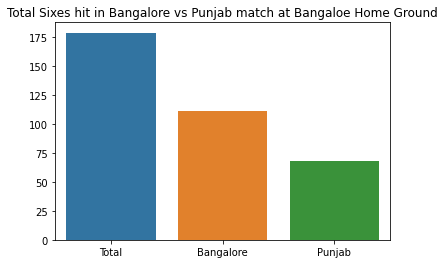

In [140]:
total_6s_per_match_Bangalore_home_ground = pd.Series([total_6s_bangalore_home_ground,total_6s_by_Bangalore_Bangalore_home_ground,total_6s_by_Punjab_Bangalore_home_ground],index=['Total','Bangalore','Punjab'])
sns.barplot(x = total_6s_per_match_Bangalore_home_ground.index , y = total_6s_per_match_Bangalore_home_ground)
plt.title('Total Sixes hit in Bangalore vs Punjab match at Bangaloe Home Ground')
plt.show()

1. Bangalore hit more sixes than Punjab at Bangalore home ground.
2. Team when batted first, hit more sixes than the team batting second at Bangalore home ground.

## No Balls at Bangalore Home Ground:

In [141]:
total_no_balls_Bangalore_home_ground = delivery1['noball_runs'].sum()
total_no_balls_Bangalore_home_ground

13

Total 13 no balls were bowled at Bangalore home ground.

In [142]:
noballs_by_Bangalore_Bangalore_home_ground = delivery1[delivery1['bowling_team'] != 'Kings XI Punjab']['noball_runs'].sum()
noballs_by_Bangalore_Bangalore_home_ground

3

Bangalore bowled 3 no balls against Punjab at Bangalore home ground.

In [143]:
noballs_by_Punjab_Bangalore_home_ground = delivery1[delivery1['bowling_team'] == 'Kings XI Punjab']['noball_runs'].sum()
noballs_by_Punjab_Bangalore_home_ground

10

Punjab bowled 10 no balls against Bangalore at Bangalore home ground.

In [144]:
avg_noballs_Bangalore_home_ground = math.ceil(total_no_balls_Bangalore_home_ground/len(ids1))
avg_noballs_Bangalore_home_ground

1

There is 1 no ball in an average per match at Bangalore home ground.

In [145]:
noballs_bowling_first_Bangalore_home_ground = delivery1[delivery1['inning'] == 1]['noball_runs'].sum()
noballs_bowling_first_Bangalore_home_ground

10

Team bowled 10 no balls while bowling first at Bangalore home ground.

In [146]:
avg_noballs_bowling_first_Bangalore_home_ground = math.ceil(noballs_bowling_first_Bangalore_home_ground/len(ids1))
avg_noballs_bowling_first_Bangalore_home_ground

1

There is 1 no ball in an average per match while bowling first at Bangalore home ground.

In [147]:
noballs_bowling_second_Bangalore_home_ground = delivery1[delivery1['inning'] == 2]['noball_runs'].sum()
noballs_bowling_second_Bangalore_home_ground

3

Team bowled 3 no balls while bowling second at Bangalore home ground.

In [148]:
avg_noballs_bowling_second_Bangalore_home_ground = math.ceil(noballs_bowling_second_Bangalore_home_ground/len(ids1))
avg_noballs_bowling_second_Bangalore_home_ground

1

There is 1 no ball in an average per match while bowling second at Bangalore home ground.

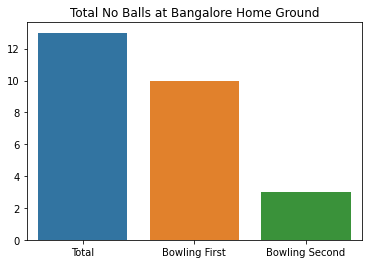

In [149]:
total_noballs_per_match_Bangalore_home_ground = pd.Series([total_no_balls_Bangalore_home_ground,noballs_bowling_first_Bangalore_home_ground,noballs_bowling_second_Bangalore_home_ground],index=['Total','Bowling First','Bowling Second'])
sns.barplot(x = total_noballs_per_match_Bangalore_home_ground.index , y = total_noballs_per_match_Bangalore_home_ground)
plt.title('Total No Balls at Bangalore Home Ground')
plt.show()

Team bowling first, bowled more no balls than team bowling second at Bangalore home ground.